In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Fit Shape Model

In [2]:
from sdss_shape_model import model_instance
from astro_utils.schechter_functions import MagSchechter

lum_func = MagSchechter(1.49 * 10**(-2), -20.44, -1.05)

In [47]:
from astropy.table import Table

def make_galaxy_sample(mag_lim=-18, size=10**5):
    galaxy_table = Table()
    galaxy_table['gal_type'] = ['centrals']*size
    galaxy_table['Mag_r'] = lum_func.rvs(m_max=mag_lim, size=size)
    
    galaxy_table = model_instance.assign_morphology_centrals(table=galaxy_table)
    
    galaxy_table = model_instance.assign_orientation_centrals(table=galaxy_table)
    
    galaxy_table = model_instance.assign_elliptical_b_to_a_centrals(table=galaxy_table)
    galaxy_table = model_instance.assign_elliptical_c_to_a_centrals(table=galaxy_table)
    
    galaxy_table = model_instance.assign_disk_b_to_a_centrals(table=galaxy_table)
    galaxy_table = model_instance.assign_disk_c_to_a_centrals(table=galaxy_table)
    
    galaxy_table = model_instance.assign_projected_b_to_a_centrals(table=galaxy_table)
    
    galaxy_table = model_instance.assign_extinction_centrals(table=galaxy_table)
    galaxy_table['obs_Mag_r'] = galaxy_table['Mag_r'] + galaxy_table['deltaMag_r']
    
    return galaxy_table

In [59]:
galaxy_table = make_galaxy_sample(mag_lim=-17, size=10**6)

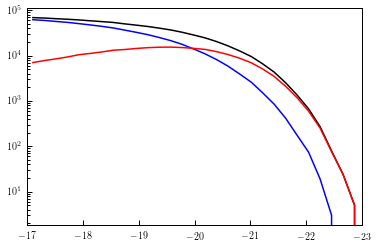

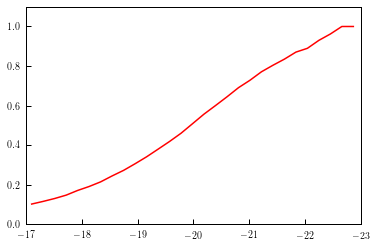

In [60]:
bins = np.linspace(-24,-17, 35)
bin_centers = (bins[:-1]+bins[1:])/2.0

x = galaxy_table['obs_Mag_r']

disks = galaxy_table['disk']==True
ellipticals = galaxy_table['elliptical']==True
phi_1 = np.histogram(x, bins=bins)[0]
phi_2 = np.histogram(x[disks], bins=bins)[0]
phi_3 = np.histogram(x[ellipticals], bins=bins)[0]

plt.figure()
plt.plot(bin_centers, phi_1, color='black')
plt.plot(bin_centers, phi_2, color='blue')
plt.plot(bin_centers, phi_3, color='red')
plt.yscale('log')
plt.xlim([-17,-23])
plt.show()

plt.figure()
plt.plot(bin_centers, phi_3/phi_1, color='red')
plt.xlim([-17,-23])
plt.ylim([0,1.1])
plt.show()

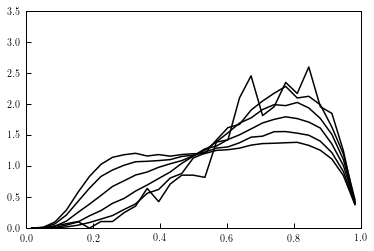

In [81]:
bins = np.linspace(0,1,30)
bin_centers = (bins[:-1]+bins[1:])/2.0

mag_key = 'obs_Mag_r'

mask_1 = (galaxy_table[mag_key]<-17) & (galaxy_table[mag_key]>-18)
mask_2 = (galaxy_table[mag_key]<-18) & (galaxy_table[mag_key]>-19)
mask_3 = (galaxy_table[mag_key]<-19) & (galaxy_table[mag_key]>-20)
mask_4 = (galaxy_table[mag_key]<-20) & (galaxy_table[mag_key]>-21)
mask_5 = (galaxy_table[mag_key]<-21) & (galaxy_table[mag_key]>-22)
mask_6 = (galaxy_table[mag_key]<-22) & (galaxy_table[mag_key]>-23)

disks = galaxy_table['disk']
ellipticals = galaxy_table['elliptical']

x = galaxy_table['galaxy_projected_b_to_a']

counts_1 = np.histogram(x[mask_1], bins=bins)[0]
counts_1 = 1.0*counts_1/np.sum(mask_1)/np.diff(bins)
counts_1a = np.histogram(x[mask_1 & disks], bins=bins)[0]
counts_1a = 1.0*counts_1a/np.sum(mask_1)/np.diff(bins)
counts_1b = np.histogram(x[mask_1 & ellipticals], bins=bins)[0]
counts_1b = 1.0*counts_1b/np.sum(mask_1)/np.diff(bins)

counts_2 = np.histogram(x[mask_2], bins=bins)[0]
counts_2 = 1.0*counts_2/np.sum(mask_2)/np.diff(bins)
counts_2a = np.histogram(x[mask_2 & disks], bins=bins)[0]
counts_2a = 1.0*counts_2a/np.sum(mask_2)/np.diff(bins)
counts_2b = np.histogram(x[mask_2 & ellipticals], bins=bins)[0]
counts_2b = 1.0*counts_2b/np.sum(mask_2)/np.diff(bins)

counts_3 = np.histogram(x[mask_3], bins=bins)[0]
counts_3 = 1.0*counts_3/np.sum(counts_3)/np.diff(bins)
counts_3a = np.histogram(x[mask_3 & disks], bins=bins)[0]
counts_3a = 1.0*counts_3a/np.sum(mask_3)/np.diff(bins)
counts_3b = np.histogram(x[mask_3 & ellipticals], bins=bins)[0]
counts_3b = 1.0*counts_3b/np.sum(mask_3)/np.diff(bins)

counts_4 = np.histogram(x[mask_4], bins=bins)[0]
counts_4 = 1.0*counts_4/np.sum(counts_4)/np.diff(bins)
counts_4a = np.histogram(x[mask_4 & disks], bins=bins)[0]
counts_4a = 1.0*counts_4a/np.sum(mask_4)/np.diff(bins)
counts_4b = np.histogram(x[mask_4 & ellipticals], bins=bins)[0]
counts_4b = 1.0*counts_4b/np.sum(mask_4)/np.diff(bins)

counts_5 = np.histogram(x[mask_5], bins=bins)[0]
counts_5 = 1.0*counts_5/np.sum(counts_5)/np.diff(bins)
counts_5a = np.histogram(x[mask_5 & disks], bins=bins)[0]
counts_5a = 1.0*counts_5a/np.sum(mask_5)/np.diff(bins)
counts_5b = np.histogram(x[mask_5 & ellipticals], bins=bins)[0]
counts_5b = 1.0*counts_5b/np.sum(mask_5)/np.diff(bins)

counts_6 = np.histogram(x[mask_6], bins=bins)[0]
counts_6 = 1.0*counts_6/np.sum(counts_6)/np.diff(bins)
counts_6a = np.histogram(x[mask_6 & disks], bins=bins)[0]
counts_6a = 1.0*counts_6a/np.sum(mask_6)/np.diff(bins)
counts_6b = np.histogram(x[mask_6 & ellipticals], bins=bins)[0]
counts_6b = 1.0*counts_6b/np.sum(mask_6)/np.diff(bins)

plt.figure()
plt.plot(bin_centers, counts_1, color='black')
plt.plot(bin_centers, counts_2, color='black')
plt.plot(bin_centers, counts_3, color='black')
plt.plot(bin_centers, counts_4, color='black')
plt.plot(bin_centers, counts_5, color='black')
plt.plot(bin_centers, counts_6, color='black')
plt.xlim([0,1])
plt.ylim([0,3.5])
plt.show()



In [79]:
from astropy.table import Table
t_1 = Table.read('./data/sample_1_shapes.dat', format='ascii')
t_2 = Table.read('./data/sample_2_shapes.dat', format='ascii')
t_3 = Table.read('./data/sample_3_shapes.dat', format='ascii')
t_4 = Table.read('./data/sample_4_shapes.dat', format='ascii')
t_5 = Table.read('./data/sample_5_shapes.dat', format='ascii')
t_6 = Table.read('./data/sample_6_shapes.dat', format='ascii')

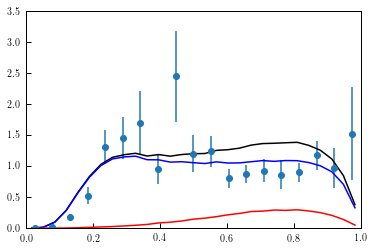

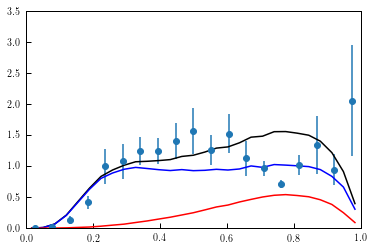

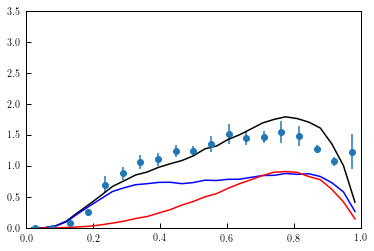

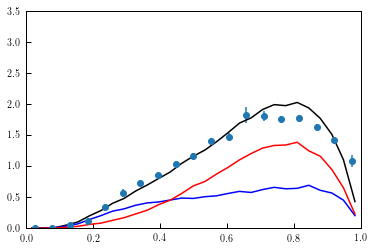

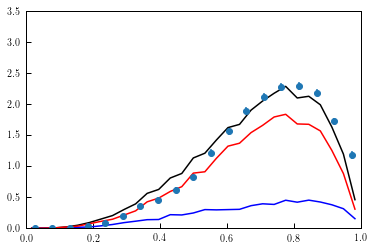

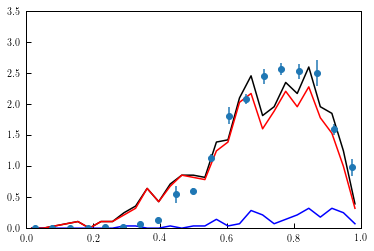

In [83]:
plt.figure()
plt.plot(bin_centers, counts_1, color='black')
plt.plot(bin_centers, counts_1a, color='blue')
plt.plot(bin_centers, counts_1b, color='red')
plt.errorbar(t_1['q'],t_1['frequency'],t_1['err'], fmt='o')
plt.xlim([0,1])
plt.ylim([0,3.5])
plt.show()

plt.figure()
plt.plot(bin_centers, counts_2, color='black')
plt.plot(bin_centers, counts_2a, color='blue')
plt.plot(bin_centers, counts_2b, color='red')
plt.errorbar(t_2['q'],t_2['frequency'],t_2['err'], fmt='o')
plt.xlim([0,1])
plt.ylim([0,3.5])
plt.show()

plt.figure()
plt.plot(bin_centers, counts_3, color='black')
plt.plot(bin_centers, counts_3a, color='blue')
plt.plot(bin_centers, counts_3b, color='red')
plt.errorbar(t_3['q'],t_3['frequency'],t_3['err'], fmt='o')
plt.xlim([0,1])
plt.ylim([0,3.5])
plt.show()

plt.figure()
plt.plot(bin_centers, counts_4, color='black')
plt.plot(bin_centers, counts_4a, color='blue')
plt.plot(bin_centers, counts_4b, color='red')
plt.errorbar(t_4['q'],t_4['frequency'],t_4['err'], fmt='o')
plt.xlim([0,1])
plt.ylim([0,3.5])
plt.show()

plt.figure()
plt.plot(bin_centers, counts_5, color='black')
plt.plot(bin_centers, counts_5a, color='blue')
plt.plot(bin_centers, counts_5b, color='red')
plt.errorbar(t_5['q'],t_5['frequency'],t_5['err'], fmt='o')
plt.xlim([0,1])
plt.ylim([0,3.5])
plt.show()

plt.figure()
plt.plot(bin_centers, counts_6, color='black')
plt.plot(bin_centers, counts_6a, color='blue')
plt.plot(bin_centers, counts_6b, color='red')
plt.errorbar(t_6['q'],t_6['frequency'],t_6['err'], fmt='o')
plt.xlim([0,1])
plt.ylim([0,3.5])
plt.show()